# ROC-AUC


ROC(Receiver operating characteristic) Curve adalah kurva yang dibentuk berdasarkan performansi dari sebuah model. Kurva ini bertujuan untuk memberikan visualisasi tentang kualitas sebuah model dalam melakukan klasifikasi berdasarkan dari confusion matrix dan probabilitas dari sebuah prediksi.
AUC(Area Under the Curve) adalah luas dari sebuah area yang dibentuk oleh kurva ROC. Biasanya untuk mengetahui skor dari performa sebuah model.

ROC dibuat berdasarkan nilai sensitivity dan specificity

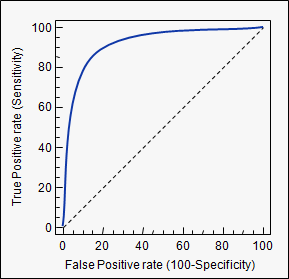

# Coding Section


Data diambil dari data pembahasan Logistic Regression

In [84]:
# Logistic Regression
import warnings
warnings.filterwarnings("ignore")
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [103]:
roc_auc_score(y_test,y_pred)

0.8529411764705883

In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

# Visualisasi ROC-AUC

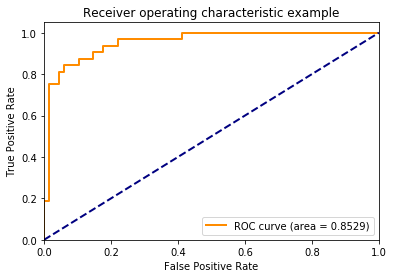

In [107]:
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test.ravel(),classifier.predict_proba(X_test)[:,1].ravel())
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc_score(y_test,y_pred))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Kesimpulan

ROC-AUC digunakan untuk memberikan insight tentang model yang sudah kita buat, semakin nilai AUC nya mendekati 1, maka semakin baik. Pengukuran ROC-AUC hanya bisa dilakukan untuk klasifikasi biner. Artinya, jika kita melakukan pengukuran ROC-AUC dalam klasifikasi multiclass, maka harus kita pecah-pecah menjadi klasifikasi biner. 

Contohnya, jika kita ingin melakukan pengukuran terhadap klasifikasi 4 kategori, yaitu A, B, C, dan D, maka ROC-AUC hang harus dibuat sebanyak 4 buah, yaitu:
<br> klasifikasi A terhadap bukan A
<br> klasifikasi B terhadap bukan B
<br> klasifikasi C terhadap bukan C
<br> klasifikasi D terhadap bukan D

Setelah itu barulah diplot agar bisa mengetahui perbandingan ROC-AUC tiap kelas.